In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=['ID Number','Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Glasstype'])
df

,ID Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glasstype
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#checking metadata of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID Number         214 non-null    int64  
 1   Refractive Index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Glasstype         214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
#checking null vlaues
df.isna().sum()

ID Number           0
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Glasstype           0
dtype: int64

In [5]:
#check unique values in label
df['Glasstype'].unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
#delete ID Number
df.drop('ID Number',axis=1,inplace=True)

In [7]:
#check stats of data
df.describe()

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glasstype
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Mg,K,Ba and Fe are having minimum values as zero   
need to check how many data points are zero

In [8]:
#check how many zeros in Mg
df[df['Magnesium']==0.00].shape[0]

42

In [9]:
#check how many zeros in K
df[df['Potassium']==0.00].shape[0]

30

In [10]:
#check how many zeros in Ba
df[df['Barium']==0.00].shape[0]

176

In [11]:
#check how many zeros in Fe
df[df['Iron']==0.00].shape[0]

144

In [12]:
Magnesium=df[df['Magnesium']!=0.00]
Potassium=df[df['Potassium']!=0.00]
Barium=df[df['Barium']!=0.00]
Iron=df[df['Iron']!=0.00]


In [13]:
#spliting the magnesium data by glass categoriy wise
magnesium_1 = Magnesium [ Magnesium['Glasstype']==1 ]
magnesium_2 = Magnesium [ Magnesium['Glasstype']==2 ]
magnesium_3 = Magnesium [ Magnesium['Glasstype']==3 ]
magnesium_5 = Magnesium [ Magnesium['Glasstype']==5 ]
magnesium_6 = Magnesium [ Magnesium['Glasstype']==6 ]
magnesium_7 = Magnesium [ Magnesium['Glasstype']==7 ]

In [14]:
# Calculating mean of magnesium for individual glass
magnesium_1_mean = magnesium_1['Magnesium'].mean()
magnesium_2_mean = magnesium_2['Magnesium'].mean()
magnesium_3_mean = magnesium_3['Magnesium'].mean()
magnesium_5_mean = magnesium_5['Magnesium'].mean()
magnesium_6_mean = magnesium_6['Magnesium'].mean()
magnesium_7_mean = magnesium_7['Magnesium'].mean()

In [15]:
#spliting the Potassium data by glass categoriy wise
Potassium_1 = Potassium [ Potassium['Glasstype']==1 ]
Potassium_2 = Potassium [ Potassium['Glasstype']==2 ]
Potassium_3 = Potassium [ Potassium['Glasstype']==3 ]
Potassium_5 = Potassium [ Potassium['Glasstype']==5 ]
Potassium_6 = Potassium [ Potassium['Glasstype']==6 ]
Potassium_7 = Potassium [ Potassium['Glasstype']==7 ]

In [16]:
# Calculating mean of Potassium for individual glass
Potassium_1_mean = Potassium_1['Potassium'].mean()
Potassium_2_mean = Potassium_2['Potassium'].mean()
Potassium_3_mean = Potassium_3['Potassium'].mean()
Potassium_5_mean = Potassium_5['Potassium'].mean()
Potassium_6_mean = Potassium_6['Potassium'].mean()
Potassium_7_mean = Potassium_7['Potassium'].mean()

In [17]:
#spliting the Barium data by glass categoriy wise
Barium_1 = Barium [ Barium['Glasstype']==1 ]
Barium_2 = Barium [ Barium['Glasstype']==2 ]
Barium_3 = Barium [ Barium['Glasstype']==3 ]
Barium_5 = Barium [ Barium['Glasstype']==5 ]
Barium_6 = Barium [ Barium['Glasstype']==6 ]
Barium_7 = Barium [ Barium['Glasstype']==7 ]


In [18]:
# Calculating mean of Barium for individual glass
Barium_1_mean = Barium_1['Barium'].mean()
Barium_2_mean = Barium_2['Barium'].mean()
Barium_3_mean = Barium_3['Barium'].mean()
Barium_5_mean = Barium_5['Barium'].mean()
Barium_6_mean = Barium_6['Barium'].mean()
Barium_7_mean = Barium_7['Barium'].mean()

In [19]:
#spliting the Iron data by glass categoriy wise
Iron_1 = Iron [ Iron['Glasstype']==1 ]
Iron_2 = Iron [ Iron['Glasstype']==2 ]
Iron_3 = Iron [ Iron['Glasstype']==3 ]
Iron_5 = Iron [ Iron['Glasstype']==5 ]
Iron_6 = Iron [ Iron['Glasstype']==6 ]
Iron_7 = Iron [ Iron['Glasstype']==7 ]



In [20]:
# Calculating mean of Iron for individual glass
Iron_1_mean = Iron_1['Iron'].mean()
Iron_2_mean = Iron_2['Iron'].mean()
Iron_3_mean = Iron_3['Iron'].mean()
Iron_5_mean = Iron_5['Iron'].mean()
Iron_6_mean = Iron_6['Iron'].mean()
Iron_7_mean = Iron_7['Iron'].mean()

In [21]:
#accesong feature as pandas series so we can iterate over it
mg=df['Magnesium']
k=df['Potassium']
ba=df['Barium']
fe=df['Iron']
g=df['Glasstype']

In [22]:
#define function for replacing zero
def replace_zero(f1,l,colno,mean_1,mean_2,mean_3,mean_5,mean_6,mean_7):

  for i in range(len(f1)):
    if f1[i]==0:

      if l[i]==1:
        df.iloc[[i],[colno]]=mean_1

      elif l[i]==2:
        df.iloc[[i],[colno]]=mean_2

      elif l[i]==3:
        df.iloc[[i],[colno]]=mean_3

      elif l[i]==5:
        df.iloc[[i],[colno]]=mean_5

      elif l[i]==6:
        df.iloc[[i],[colno]]=mean_6

      elif l[i]==7:
       df.iloc[[i],[colno]]=mean_7

    else:
      df.iloc[[i],[colno]]=f1[i]



In [23]:
# Replacing zeros in magnesium with there mean as per glasstype
replace_zero(mg,g,2,magnesium_1_mean,magnesium_2_mean,magnesium_3_mean,magnesium_5_mean,magnesium_6_mean,magnesium_7_mean)

In [24]:
# Replacing zeros in Potassium with there mean as per glasstype
replace_zero(k,g,5,Potassium_1_mean,Potassium_2_mean,Potassium_3_mean,Potassium_5_mean,Potassium_6_mean,Potassium_7_mean)


In [25]:
# Replacing zeros in Barium with there mean as per glasstype
replace_zero(ba,g,7,Barium_1_mean,Barium_2_mean,Barium_3_mean,Barium_5_mean,Barium_6_mean,Barium_7_mean)

In [26]:
# Replacing zeros in Iron with there mean as per glasstype
replace_zero(fe,g,8,Iron_1_mean,Iron_2_mean,Iron_3_mean,Iron_5_mean,Iron_6_mean,Iron_7_mean)

In [27]:
#cross check is there any zeros in Magnesium
df[df['Magnesium']==0.00].shape[0]

0

In [28]:
#cross check is there any zeros in Potassium
df[df['Potassium']==0.00].shape[0]

0

In [29]:
##cross check is there any zeros in Barium
df[df['Barium']==0.00].shape[0]

0

In [30]:
##cross check is there any zeros in Iron
df[df['Iron']==0.00].shape[0]

0

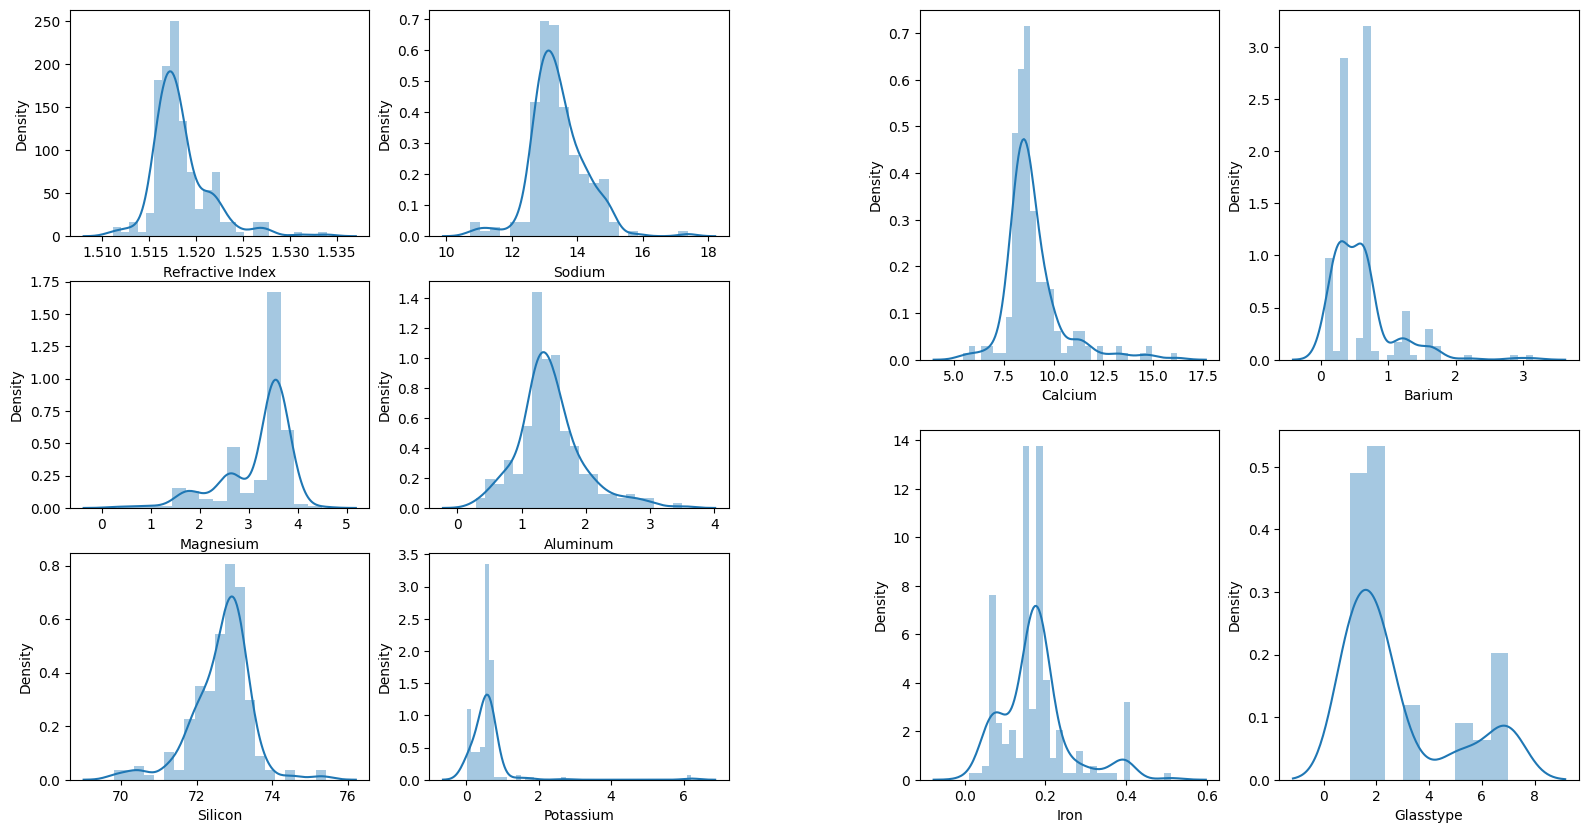

In [31]:
#plot distribution of data
fig=plt.figure(figsize=(17,10))
(top,bot)=fig.subfigures(1,2)
top_axs=top.subplots(3,2)
bot_axs=bot.subplots(2,2)
sns.distplot(df['Refractive Index'],ax=top_axs[0,0])
sns.distplot(df['Sodium'],ax=top_axs[0,1])
sns.distplot(df['Magnesium'],ax=top_axs[1,0])
sns.distplot(df['Aluminum'],ax=top_axs[1,1])
sns.distplot(df['Silicon'],ax=top_axs[2,0])
sns.distplot(df['Potassium'],ax=top_axs[2,1])
sns.distplot(df['Calcium'],ax=bot_axs[0,0])
sns.distplot(df['Barium'],ax=bot_axs[0,1])
sns.distplot(df['Iron'],ax=bot_axs[1,0])
sns.distplot(df['Glasstype'],ax=bot_axs[1,1])
plt.show()

<Axes: xlabel='Glasstype', ylabel='count'>

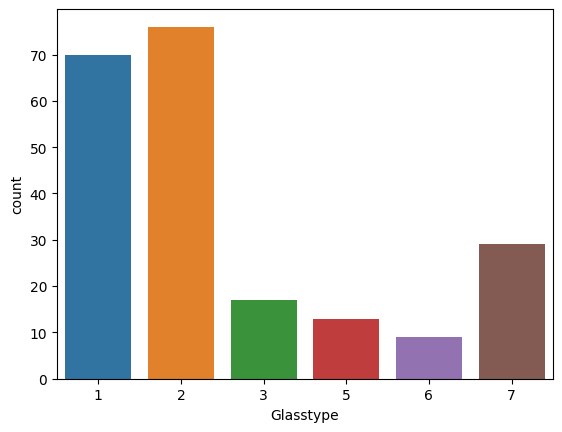

In [32]:
#check count of individual classes
sns.countplot(df,x='Glasstype')

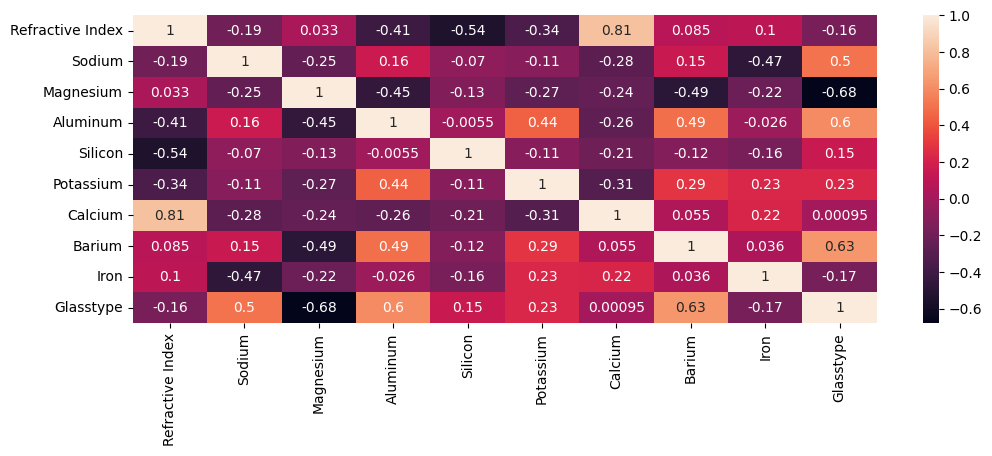

In [33]:
#check correlation using heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df.dropna(inplace=True)

In [70]:
df=df.drop_duplicates()

In [36]:
df.shape

(205, 10)

In [37]:
#check stats of dat
df.skew()

Refractive Index    1.754544
Sodium              0.002419
Magnesium          -1.682101
Aluminum            1.009296
Silicon            -1.062819
Potassium           7.041660
Calcium             2.166544
Barium              2.283861
Iron                1.128301
Glasstype           1.319960
dtype: float64

Except sodium all other features are skewed  
magnesium and silicon are negatively skewed  


In [38]:
skewed_f=['Refractive Index','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron']
pw=PowerTransformer(method='yeo-johnson',standardize=False)
skdf=pw.fit_transform(df[skewed_f])

In [39]:
skdf

array([[3.02578690e-02, 7.28004003e+02, 6.98800085e-01, ...,
        6.70683926e-01, 2.08516354e-01, 1.16009669e-01],
       [3.02578690e-02, 3.11904171e+02, 8.01241327e-01, ...,
        6.66619356e-01, 2.08516354e-01, 1.16009669e-01],
       [3.02578690e-02, 2.95985084e+02, 8.64755959e-01, ...,
        6.66368516e-01, 2.08516354e-01, 1.16009669e-01],
       ...,
       [3.02578690e-02, 9.64734688e+01, 1.01135403e+00, ...,
        6.69421773e-01, 4.65328450e-01, 5.66169155e-02],
       [3.02578690e-02, 9.64734688e+01, 9.88886509e-01, ...,
        6.69590286e-01, 4.60342458e-01, 5.66169155e-02],
       [3.02578690e-02, 9.64734688e+01, 1.02775512e+00, ...,
        6.70166684e-01, 4.67355560e-01, 5.66169155e-02]])

Calcium and refractive index are having strong positive correlation  
magnesium and glasstype are having strong negative correlation  
Aluminium and glasstype are having strong postive correlation  
Barium and glasstype are having strong postive correlation

In [40]:
X=df.drop('Glasstype',axis=1)
y=df['Glasstype']

In [41]:
X[skewed_f]=skdf

In [42]:
X

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,0.030258,13.64,728.004003,0.698800,2.331547e+38,0.056434,0.670684,0.208516,0.116010
1,0.030258,13.89,311.904171,0.801241,3.074095e+38,0.318214,0.666619,0.208516,0.116010
2,0.030258,13.53,295.985084,0.864756,3.313674e+38,0.276077,0.666369,0.208516,0.116010
3,0.030258,13.21,342.259410,0.775002,2.969175e+38,0.355284,0.668463,0.208516,0.116010
4,0.030258,13.27,318.458124,0.755682,3.400675e+38,0.347437,0.667777,0.208516,0.116010
...,...,...,...,...,...,...,...,...,...
209,0.030258,14.14,96.473469,1.216377,2.969175e+38,0.073782,0.672281,0.408973,0.056617
210,0.030258,14.92,96.473469,1.003011,3.381155e+38,0.409749,0.669252,0.461805,0.056617
211,0.030258,14.36,96.473469,1.011354,3.749404e+38,0.409749,0.669422,0.465328,0.056617
212,0.030258,14.38,96.473469,0.988887,3.958863e+38,0.409749,0.669590,0.460342,0.056617


In [43]:
kbest=SelectKBest(score_func=chi2,k=6)
new_x=kbest.fit_transform(X,y)
# kbestdf=pd.DataFrame()
# kbestdf['score']=kbest.scores_
# kbestdf['feature']=X.columns
# kbestdf

In [44]:
#normalize data
scal=StandardScaler()
x_scal=scal.fit_transform(new_x)

In [45]:
mxsc=0
ind=0
#split data
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=i)
  tr_model=LogisticRegression().fit(x_train,y_train)
  y_pred=tr_model.predict(x_test)
  sc=accuracy_score(y_test,y_pred)

  if sc>mxsc:
    mxsc=sc
    ind=i
print(mxsc,' at random state ',ind)


0.9423076923076923  at random state  1


In [46]:
#split data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=ind)

In [47]:
#define function for buildinf model
def fit_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('----Training Score-----')
  y_tr_predict=alg.predict(x_train)
  tr_sc=accuracy_score(y_train,y_tr_predict)
  print(tr_sc)
  print('-----------------------------------------\n')
  print('----testing score------------------')
  y_predcted=alg.predict(x_test)
  test_sc=accuracy_score(y_test,y_predcted)
  print(test_sc)
  print('\n------Confusion Matrix-------')
  print(confusion_matrix(y_test,y_predcted))

  return alg


In [48]:
#training logistic regression
lc=fit_model(LogisticRegression(),x_train,x_test,y_train,y_test)

----Training Score-----
0.8496732026143791
-----------------------------------------

----testing score------------------
0.9423076923076923

------Confusion Matrix-------
[[19  1  0  0  0]
 [ 0 18  0  0  0]
 [ 2  0  1  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  6]]


In [49]:
#training RandomForestClassifier
rfr=fit_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
1.0
-----------------------------------------

----testing score------------------
1.0

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  6]]


In [50]:
#training GradientBoostingClassifier
gd=fit_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
1.0
-----------------------------------------

----testing score------------------
0.9230769230769231

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 1 17  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 3  0  0  0  3]]


In [51]:
#training BaggingClassifier
bg=fit_model(BaggingClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
0.9869281045751634
-----------------------------------------

----testing score------------------
0.9423076923076923

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 0 17  0  1  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  1  4]]


In [52]:
#training AdaBoostClassifier
ad=fit_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
0.8235294117647058
-----------------------------------------

----testing score------------------
0.7884615384615384

------Confusion Matrix-------
[[18  0  0  0  2]
 [ 0 18  0  0  0]
 [ 3  0  0  0  0]
 [ 0  3  0  1  1]
 [ 0  2  0  0  4]]


In [53]:
#training SVC
svc=fit_model(SVC(),x_train,x_test,y_train,y_test)

----Training Score-----
0.9477124183006536
-----------------------------------------

----testing score------------------
1.0

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  6]]


In [54]:
#training KNeighborsClassifier
knn=fit_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
0.9215686274509803
-----------------------------------------

----testing score------------------
0.8846153846153846

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 1 16  0  1  0]
 [ 2  0  1  0  0]
 [ 0  2  0  3  0]
 [ 0  0  0  0  6]]


In [55]:
#training DecisionTreeClassifier
dt=fit_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

----Training Score-----
1.0
-----------------------------------------

----testing score------------------
0.9423076923076923

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 0 17  0  1  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 1  1  0  0  4]]


In [56]:
#cross validation
def cross_check(model,tr_model,x_scal,y,n):
  cv=cross_val_score(model,x_scal,y,cv=n)
  print(cv,'\n')
  print("%2.2f"%(np.mean(cv)*100))

  print('difference between model accuracy score and cross validation scor is : %2.2f '%((accuracy_score(y_test,tr_model.predict(x_test))-np.mean(cv))*100))

In [57]:
#cross vlidation of LogisticRegression
cross_check(LogisticRegression(),lc,x_scal,y,20)

[0.90909091 0.72727273 0.81818182 1.         1.         1.
 0.9        0.8        0.8        0.8        0.7        0.9
 0.9        0.9        0.9        0.7        0.9        0.9
 0.8        0.9       ] 

86.27
difference between model accuracy score and cross validation scor is : 7.96 


In [58]:
#cross vlidation of RandomForestClassifier
cross_check(RandomForestClassifier(),rfr,x_scal,y,20)

[1.         1.         0.90909091 0.90909091 1.         1.
 1.         0.9        0.9        1.         1.         1.
 1.         1.         1.         0.9        1.         0.9
 0.9        0.9       ] 

96.09
difference between model accuracy score and cross validation scor is : 3.91 


In [59]:
#cross vlidation of GradientBoostingClassifier
cross_check(GradientBoostingClassifier(),gd,x_scal,y,20)

[1.         1.         1.         0.81818182 1.         1.
 1.         0.9        0.9        0.9        0.9        1.
 1.         1.         0.9        0.8        0.9        0.9
 0.9        0.8       ] 

93.09
difference between model accuracy score and cross validation scor is : -0.78 


In [60]:
#cross vlidation of BaggingClassifier
cross_check(BaggingClassifier(),bg,x_scal,y,20)

[1.         1.         1.         0.81818182 0.90909091 1.
 1.         0.9        0.9        0.9        0.8        1.
 1.         1.         0.9        0.9        1.         0.9
 0.9        0.9       ] 

93.64
difference between model accuracy score and cross validation scor is : 0.59 


In [61]:
#cross vlidation of AdaBoostClassifier
cross_check(AdaBoostClassifier(),ad,x_scal,y,20)

[0.72727273 0.72727273 0.72727273 0.72727273 0.81818182 0.9
 0.8        0.7        0.7        0.8        0.8        0.8
 0.8        0.8        0.7        0.6        0.6        0.6
 0.6        0.6       ] 

72.64
difference between model accuracy score and cross validation scor is : 6.21 


In [62]:
#cross vlidation of SVC
cross_check(SVC(),svc,x_scal,y,20)

[0.90909091 0.90909091 1.         1.         1.         1.
 0.9        0.9        0.8        0.9        1.         0.9
 1.         1.         0.9        0.8        1.         0.9
 0.9        0.9       ] 

93.09
difference between model accuracy score and cross validation scor is : 6.91 


In [63]:
#cross vlidation of KNeighborsClassifier
cross_check(KNeighborsClassifier(),knn,x_scal,y,20)

[0.90909091 0.90909091 0.90909091 1.         1.         1.
 0.9        0.9        0.7        0.8        0.7        0.6
 1.         1.         0.9        0.8        0.8        0.9
 0.9        0.9       ] 

87.64
difference between model accuracy score and cross validation scor is : 0.83 


In [64]:
#cross vlidation of DecisionTreeClassifier
cross_check(DecisionTreeClassifier(),dt,x_scal,y,20)

[1.         1.         1.         0.72727273 0.90909091 1.
 0.9        0.9        0.9        0.9        0.8        1.
 1.         1.         0.9        0.7        1.         0.9
 0.9        0.9       ] 

91.68
difference between model accuracy score and cross validation scor is : 2.55 


In [65]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
grid_search.fit(x_scal, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)




Best parameters:  {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best score:  0.9609756097560975


In [66]:
#training final model
tr_bg=fit_model(BaggingClassifier(bootstrap=True,max_features=0.5,max_samples=0.5,n_estimators=100),x_train,x_test,y_train,y_test)

----Training Score-----
1.0
-----------------------------------------

----testing score------------------
0.9807692307692307

------Confusion Matrix-------
[[20  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0  6]]


In [67]:
# Saving model
import pickle
pickle.dump(tr_bg,open('Glassdataset_BaggingClassifierr.sav','wb'))

In [68]:
# Loading Model
model=pickle.load(open('Glassdataset_BaggingClassifierr.sav','rb'))

In [69]:
cmp_df=pd.DataFrame()
cmp_df['y_test']=y_test
cmp_df['y_predicted']=model.predict(x_test)
cmp_df

,y_test,y_predicted
78,2,2
97,2,2
151,3,3
44,1,1
40,1,1
67,1,1
98,2,2
18,1,1
152,3,3
62,1,1
